In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML
import plotly.express as px

In [2]:
# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

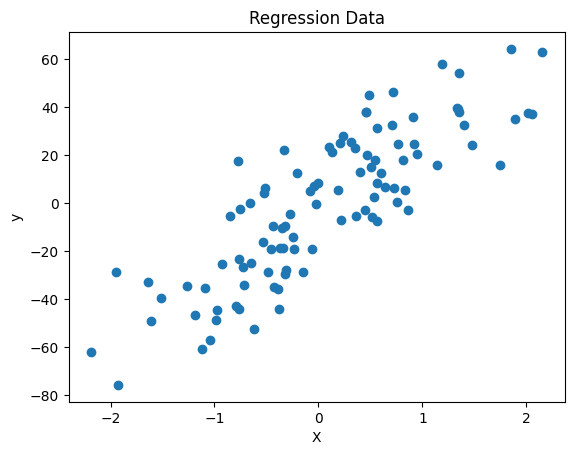

In [3]:
# Visualize the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Data')
plt.show()

In [4]:
# Create the cost function surface
m_arr = np.linspace(-150, 150, 20)
b_arr = np.linspace(-150, 150, 20)
mGrid, bGrid = np.meshgrid(m_arr, b_arr)

final = np.vstack((mGrid.ravel().reshape(1, 400), bGrid.ravel().reshape(1, 400))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i, 0] * X.reshape(100) - final[i, 1]) ** 2))

z_arr = np.array(z_arr).reshape(20, 20)

In [6]:
# Run gradient descent
b = 150
m = -127.82
lr = 0.001
all_b = [b]  # Store initial values
all_m = [m]  # Store initial values
all_cost = []

epochs = 50

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
        slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b) * X[j]
        cost = cost + (y[j] - m * X[j] - b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)
    
# print(f"Final parameters: m = {m:.4f}, b = {b:.4f}")

In [7]:
# Create animated plot showing gradient descent
fig = go.Figure()

# Add the cost function surface
fig.add_trace(
    go.Surface(x=m_arr, y=b_arr, z=z_arr, colorscale='Viridis', opacity=0.8,
               contours={
                   "z": {"show": True, "start": 0, "end": 500000, "size": 50000}
               })
)

# Create frames for the animation
frames = []
for i in range(len(all_m)):
    frames.append(
        go.Frame(
            data=[
                # Surface remains the same
                go.Surface(x=m_arr, y=b_arr, z=z_arr, colorscale='Viridis', opacity=0.8),
                # Plot the gradient descent path up to the current step
                go.Scatter3d(
                    x=all_m[:i+1], 
                    y=all_b[:i+1], 
                    z=[all_cost[j] if j < len(all_cost) else all_cost[0] for j in range(i+1)],
                    mode='lines+markers',
                    line=dict(color='red', width=5),
                    marker=dict(size=5, color='white')
                ),
                # Highlight the current position
                go.Scatter3d(
                    x=[all_m[i]],
                    y=[all_b[i]],
                    z=[all_cost[i-1] if i > 0 and i-1 < len(all_cost) else (all_cost[0] if len(all_cost) > 0 else 0)],
                    mode='markers',
                    marker=dict(size=10, color='red', symbol='circle')
                )
            ],
            name=f'Step {i}'
        )
    )

# Initial view is just the surface
fig.add_trace(
    go.Scatter3d(
        x=[all_m[0]], 
        y=[all_b[0]], 
        z=[all_cost[0] if len(all_cost) > 0 else 0],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle')
    )
)

# Update the layout
fig.update_layout(
    title='Gradient Descent Optimization Animation',
    scene=dict(
        xaxis_title='m (slope)',
        yaxis_title='b (intercept)',
        zaxis_title='Cost (MSE)',
        aspectratio=dict(x=1, y=1, z=0.7),
    ),
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 200, "redraw": True},
                                    "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                    "mode": "immediate",
                                    "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ],
    sliders=[
        {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 16},
                "prefix": "Step: ",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {
                    "args": [
                        [f.name],
                        {"frame": {"duration": 300, "redraw": True},
                         "mode": "immediate",
                         "transition": {"duration": 300}}
                    ],
                    "label": str(k),
                    "method": "animate"
                }
                for k, f in enumerate(frames)
            ]
        }
    ],
    width=900,
    height=700,
    autosize=False
)

fig.frames = frames

# Show the figure
fig.show()

# Save as HTML for sharing
fig.write_html("gradient_descent_3d_animation.html")

In [8]:
# Create a 2D contour view with animation
contour_fig = go.Figure()

# Add the contour plot
contour_fig.add_trace(
    go.Contour(z=z_arr, x=m_arr, y=b_arr, colorscale='Viridis')
)

# Create frames for the animation
contour_frames = []
for i in range(len(all_m)):
    contour_frames.append(
        go.Frame(
            data=[
                # Contour remains the same
                go.Contour(z=z_arr, x=m_arr, y=b_arr, colorscale='Viridis'),
                # Plot the gradient descent path up to the current step
                go.Scatter(
                    x=all_m[:i+1], 
                    y=all_b[:i+1], 
                    mode='lines+markers',
                    line=dict(color='red', width=3),
                    marker=dict(size=8, color='white')
                ),
                # Highlight the current position
                go.Scatter(
                    x=[all_m[i]],
                    y=[all_b[i]],
                    mode='markers',
                    marker=dict(size=12, color='red', symbol='circle')
                )
            ],
            name=f'Step {i}'
        )
    )

# Initial view is just the contour with the starting point
contour_fig.add_trace(
    go.Scatter(
        x=[all_m[0]], 
        y=[all_b[0]], 
        mode='markers',
        marker=dict(size=12, color='red', symbol='circle')
    )
)

# Update the layout
contour_fig.update_layout(
    title='Gradient Descent on Contour Plot',
    xaxis_title='m (slope)',
    yaxis_title='b (intercept)',
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 200, "redraw": True},
                                    "fromcurrent": True}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": True},
                                    "mode": "immediate",
                                    "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ],
    sliders=[
        {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 16},
                "prefix": "Step: ",
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [
                {
                    "args": [
                        [f.name],
                        {"frame": {"duration": 300, "redraw": True},
                         "mode": "immediate",
                         "transition": {"duration": 300}}
                    ],
                    "label": str(k),
                    "method": "animate"
                }
                for k, f in enumerate(contour_frames)
            ]
        }
    ],
    width=700,
    height=600
)

contour_fig.frames = contour_frames

# Show the figure
contour_fig.show()

# Save as HTML
contour_fig.write_html("gradient_descent_contour_animation.html")